In [121]:
using Eirene
using DelimitedFiles
using PlotlyJS

In [138]:
# filepath = "/PHAML/data/data.csv"
folder_path = "C:/Users/jevin/Documents/Documents/Education/Self-Learning/Persistant Homology/PHAML"
filepath = folder_path * "/data/data.csv" # * is used for string concatenation julia
POINTCLOUD = readdlm(filepath, ',')

2×6 Matrix{Float64}:
 0.0  0.0  1.0  1.0  2.0  4.0
 0.0  1.0  0.0  1.0  1.0  1.0

In [123]:
n = size(POINTCLOUD,2)

6

In [139]:
PH = eirene(POINTCLOUD, maxdim=2, model="pc") # computes the PH of POINTCLOUD. 
# Eirene generally uses Vietoris–Rips filtration
# maxdim - we don't compute higher dimensions

Dict{String, Any} with 12 entries:
  "symmat"   => [5 4 … 4 0; 4 5 … 3 0; … ; 4 3 … 5 2; 0 0 … 2 5]
  "maxnz"    => [0, 15, 9, 5, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7], [1, 5, 8, 10, 11, 12, 12], [1, 7, 10, 1…
  "cyclerep" => [Vector{Int64}[], [[1, 5], [1, 3], [1, 2], [1, 6], [4, 1], [4]]…
  "phi"      => [Int64[], [4, 2, 1, 11, 6], [1, 3, 5, 6, 2, 4], [1, 2, 3, 4], I…
  "plo"      => [Int64[], [5, 3, 2, 6, 1], [5, 7, 9, 10, 3, 8], [8, 9, 7, 10], …
  "ocg2rad"  => [2.23607, 2.0, 1.41421, 1.0, 0.0]
  "farfaces" => [[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 6], [5, 6, …
  "nvl2ovl"  => [4, 3, 2, 1, 5, 6]
  "input"    => Dict{String, Any}("genera"=>[0.0 0.0 … 2.0 4.0; 0.0 1.0 … 1.0 1…
  "tid"      => [Int64[], [5, 3, 2, 6, 1, 4], [5, 7, 9, 10, 3, 8], [8, 9, 7, 10…
  "grain"    => [[5, 5, 5, 5, 5, 5], [4, 4, 3, 4, 3, 4, 3, 4, 2, 1, 2], [3, 3, …

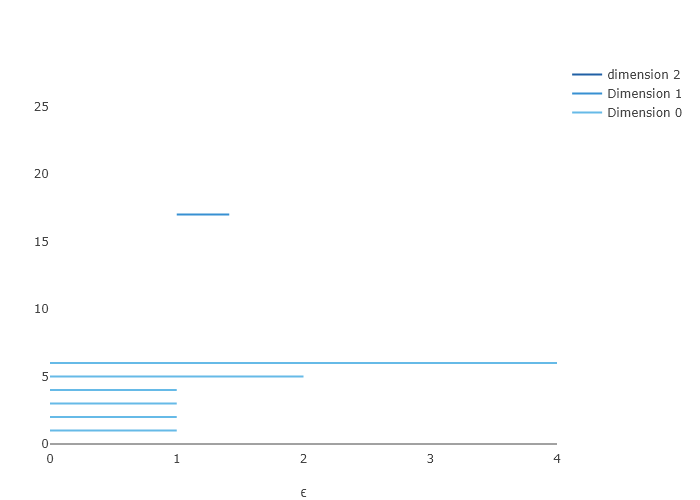

In [130]:
# Plot diagram up to voids
plotbarcode_pjs(PH,dim=0:2)

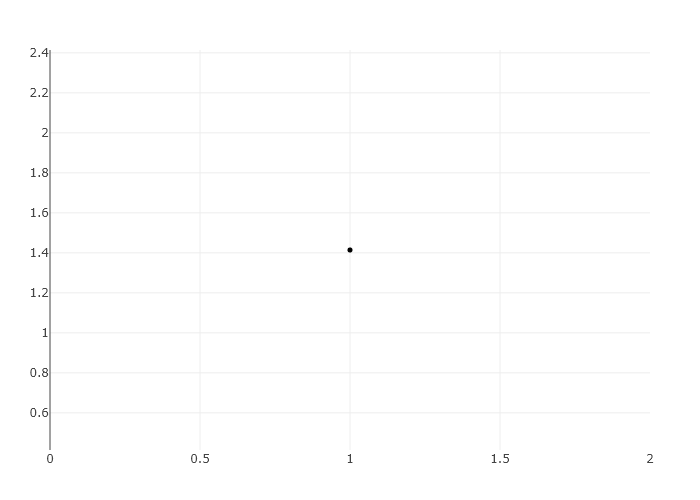

In [131]:
plotpersistencediagram_pjs(PH,dim=1)
# x -> birth time
# y -> death time
# ezplot_pjs(POINTCLOUD)

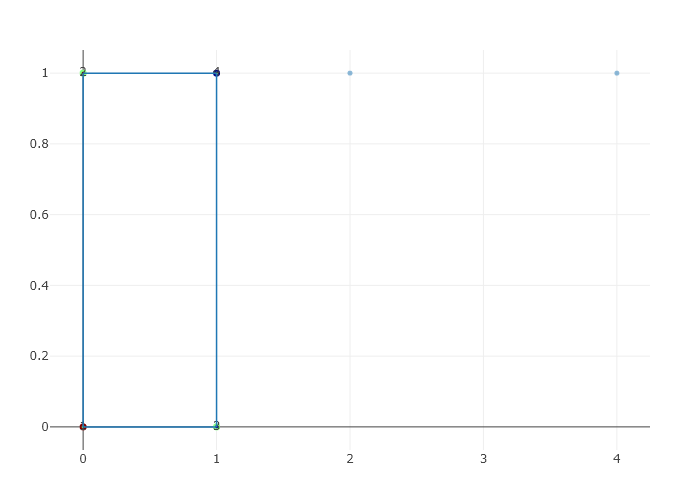

In [ ]:
plotclassrep_pjs(PH,dim=1,class=1)
# A Cycle should be drawn